In [1]:
try:
    %matplotlib inline
    %reload_ext lab_black
except Exception as e:
    print(e)

import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

In [2]:
train_df = pd.read_csv("data/na_fill.csv", index_col="id")

X_train = train_df.loc[:, "650_dst":"990_dst"]
y_train = train_df.loc[:, "hhb":"na"]

X_train.shape, y_train.shape

((10000, 35), (10000, 4))

In [3]:
X_train

,650_dst,660_dst,670_dst,680_dst,690_dst,700_dst,710_dst,720_dst,730_dst,740_dst,...,900_dst,910_dst,920_dst,930_dst,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst
id,,,,,,,,,,,,,,,,,,,,,
0,2.450000e-18,1.890000e-18,4.150000e-18,6.410000e-18,1.100000e-17,8.910000e-19,1.890000e-18,2.900000e-18,3.900000e-18,4.900000e-18,...,3.080000e-18,3.530000e-18,2.090000e-18,6.460000e-19,7.510000e-19,8.570000e-19,9.620000e-19,1.070000e-18,6.000000e-18,4.380000e-17
1,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e-10,1.030000e-10,1.050000e-10,1.070000e-10,1.090000e-10,1.110000e-10,1.130000e-10,...,2.650000e-09,3.940000e-09,5.230000e-09,1.260000e-08,1.340000e-08,6.110000e-09,2.130000e-09,5.920000e-09,9.710000e-09,9.710000e-09
2,1.680000e-19,3.760000e-20,2.100000e-19,3.820000e-19,5.540000e-19,7.260000e-19,8.980000e-19,1.940000e-19,8.130000e-19,2.180000e-19,...,4.630000e-18,1.410000e-18,3.240000e-18,2.920000e-18,2.600000e-18,2.280000e-18,1.970000e-18,1.650000e-18,1.330000e-18,1.330000e-18
3,4.040000e-11,4.700000e-11,5.350000e-11,9.110000e-12,1.880000e-11,3.620000e-11,7.910000e-13,7.960000e-11,1.580000e-10,1.630000e-10,...,1.270000e-10,6.120000e-11,1.140000e-10,1.660000e-10,2.250000e-10,1.300000e-10,7.780000e-11,2.430000e-10,4.090000e-10,4.090000e-10
4,4.780000e-14,7.030000e-14,9.280000e-14,1.150000e-13,1.120000e-13,1.090000e-13,1.060000e-13,7.940000e-14,5.300000e-14,2.670000e-14,...,8.740000e-14,5.140000e-14,1.540000e-14,5.000000e-14,1.460000e-13,8.770000e-14,1.100000e-13,1.330000e-13,1.330000e-13,1.330000e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.730000e-15,1.440000e-14,2.050000e-14,2.660000e-14,3.270000e-14,3.880000e-14,1.110000e-14,4.200000e-14,2.800000e-14,1.410000e-14,...,4.070000e-15,2.310000e-15,2.690000e-15,1.690000e-15,6.790000e-16,6.150000e-16,5.520000e-16,9.690000e-16,1.390000e-15,5.460000e-14
9996,0.000000e+00,3.020000e-17,2.480000e-17,1.930000e-17,1.390000e-17,8.450000e-18,2.320000e-17,3.790000e-17,4.790000e-17,5.780000e-17,...,2.010000e-16,1.090000e-16,1.640000e-17,6.860000e-17,1.810000e-16,1.120000e-16,7.350000e-17,3.280000e-16,5.830000e-16,4.230000e-15
9997,7.250000e-12,1.430000e-11,2.130000e-11,1.360000e-11,1.020000e-11,8.770000e-12,7.360000e-12,5.940000e-12,1.020000e-11,4.220000e-12,...,6.900000e-11,6.760000e-11,6.620000e-11,6.470000e-11,4.830000e-11,3.110000e-11,8.120000e-12,7.930000e-11,1.500000e-10,4.000000e-10


In [4]:
plt.rcParams["figure.figsize"] = (12, 8)

In [5]:
import os

if not os.path.exists("plot"):
    os.makedirs("plot")

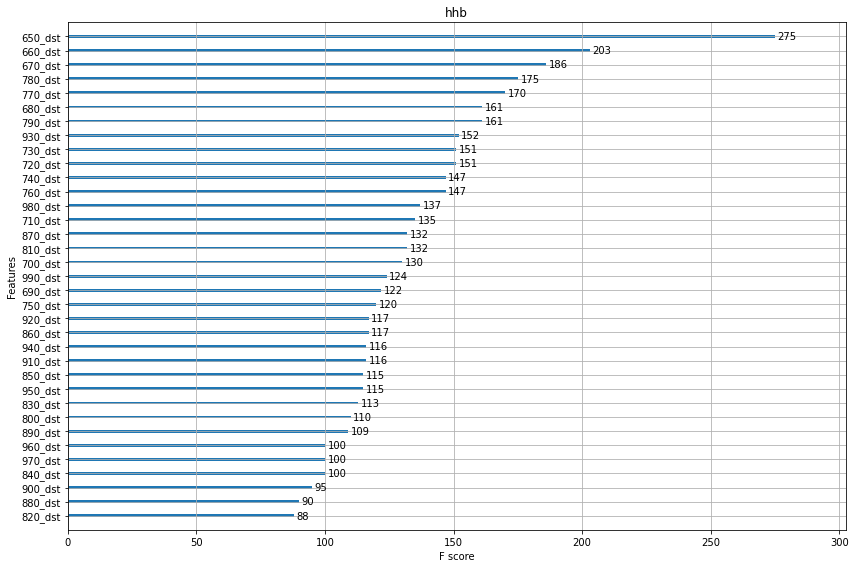

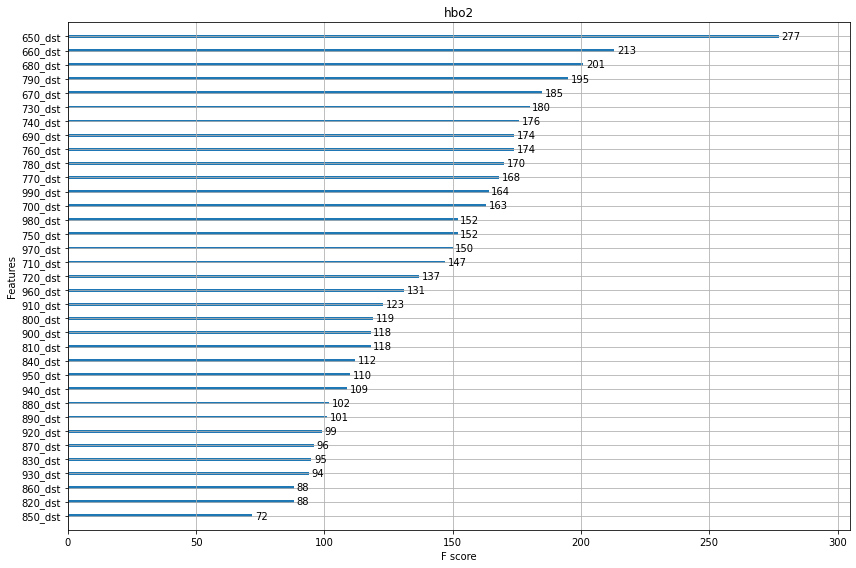

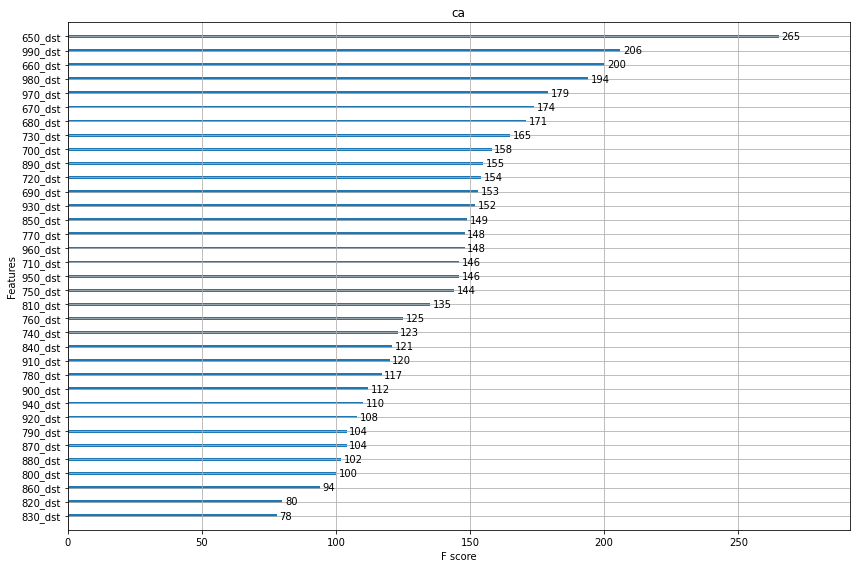

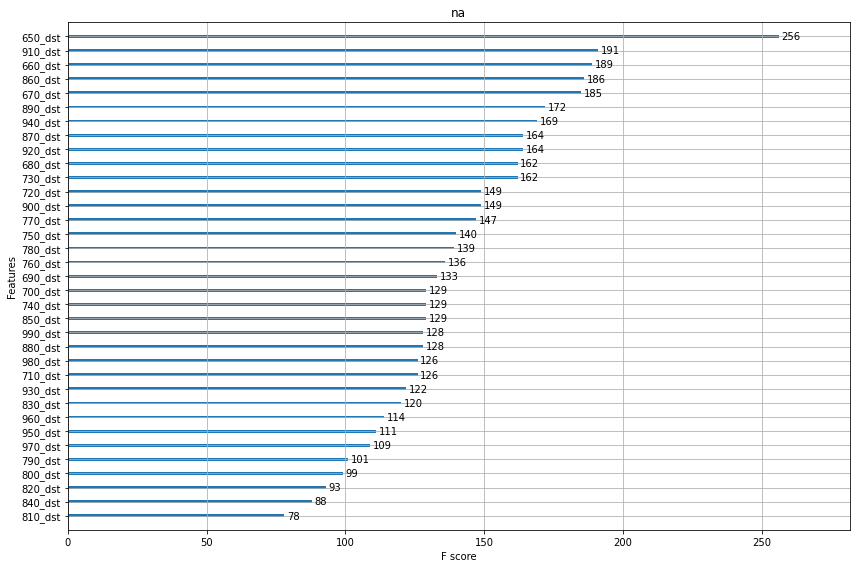

In [6]:
from xgboost import plot_importance

for label in y_train:
    model = xgb.XGBRegressor()
    model.fit(X_train, y_train[label])

    ax = plot_importance(model)
    ax.set_title(label)
    ax.figure.tight_layout()
    ax.figure.savefig(f"plot/origin-{label}.png")

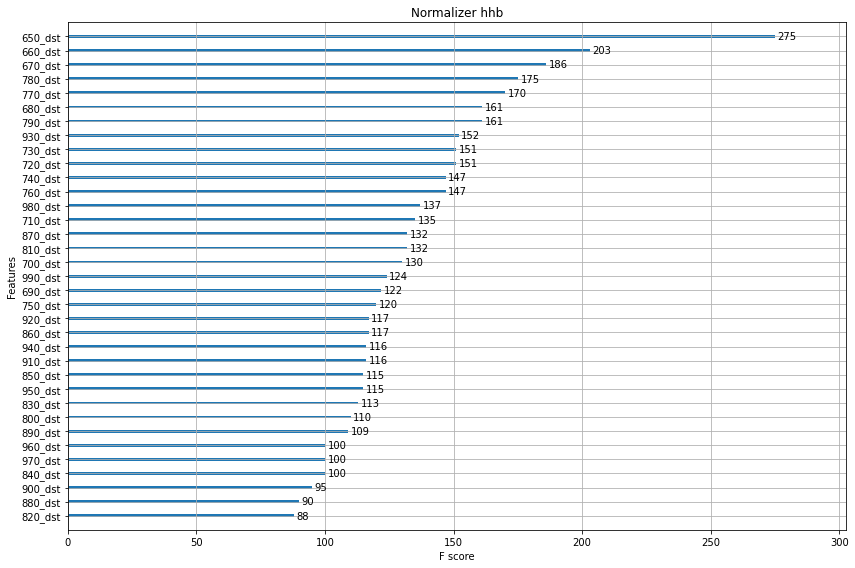

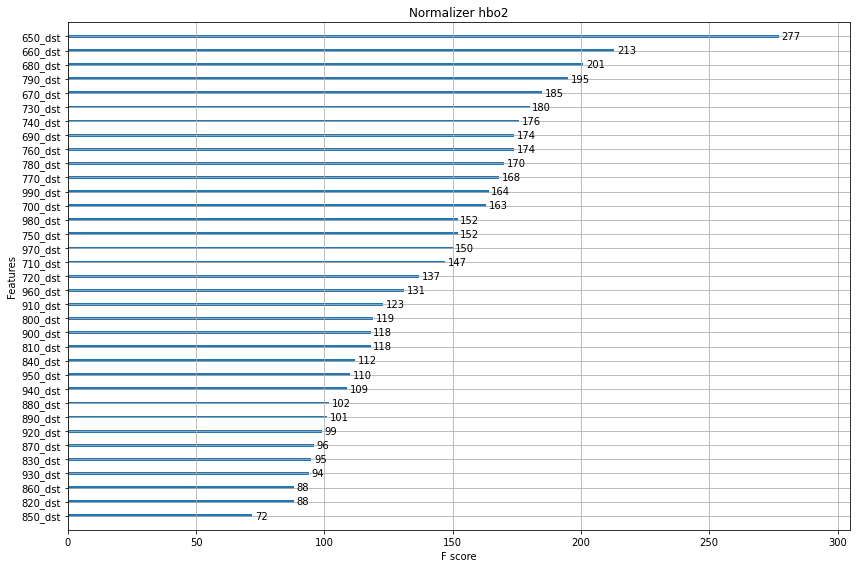

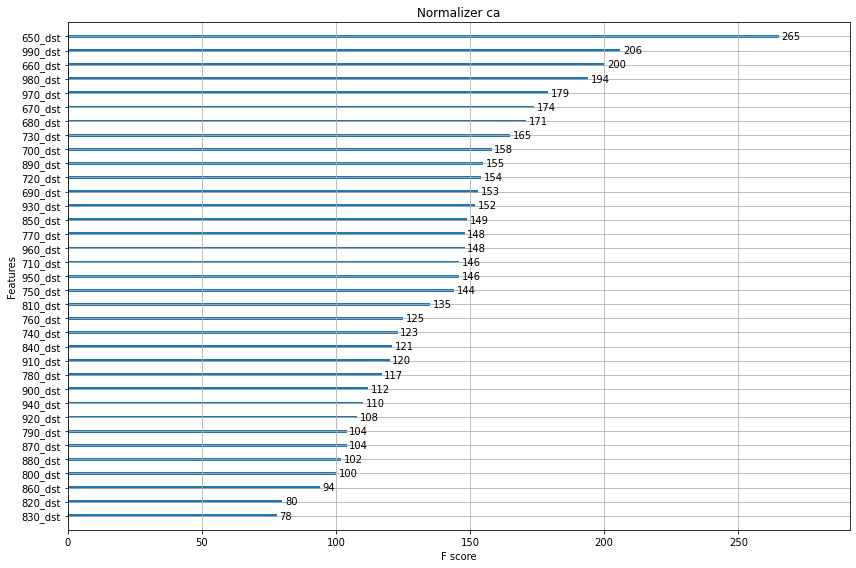

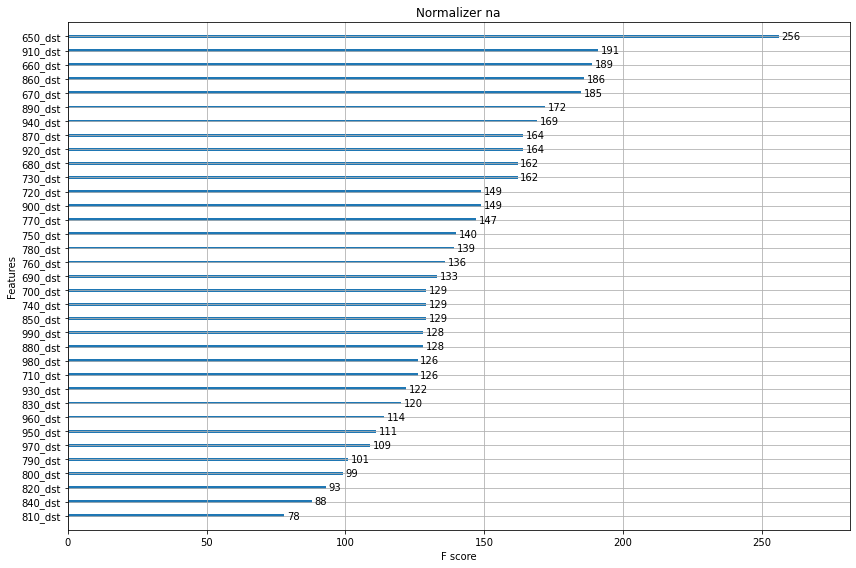

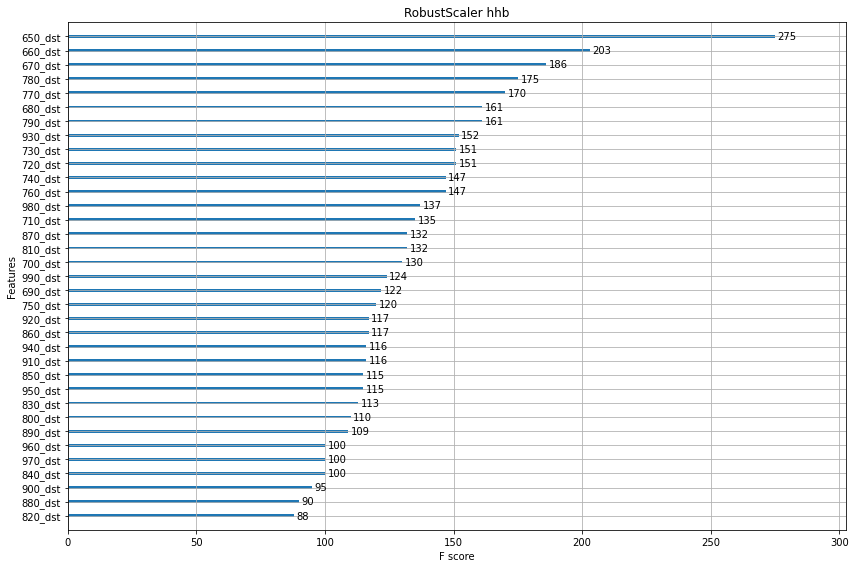

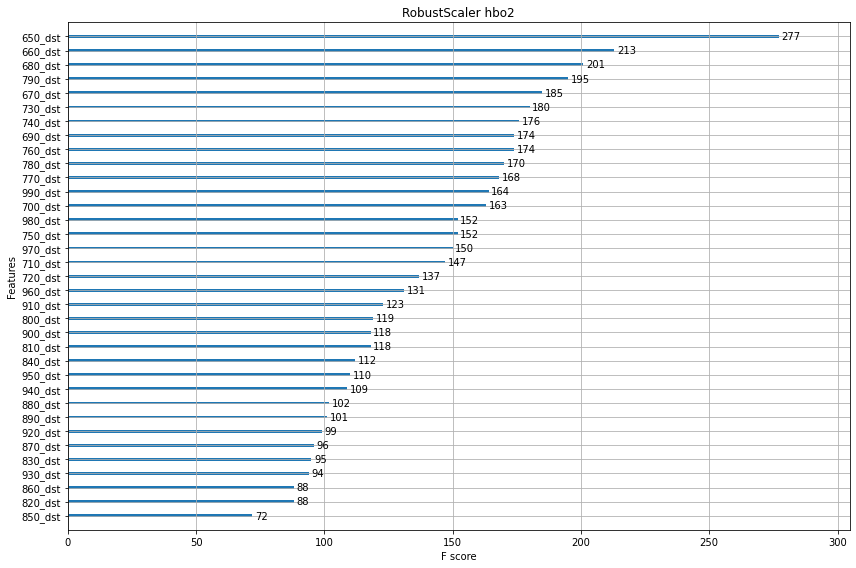

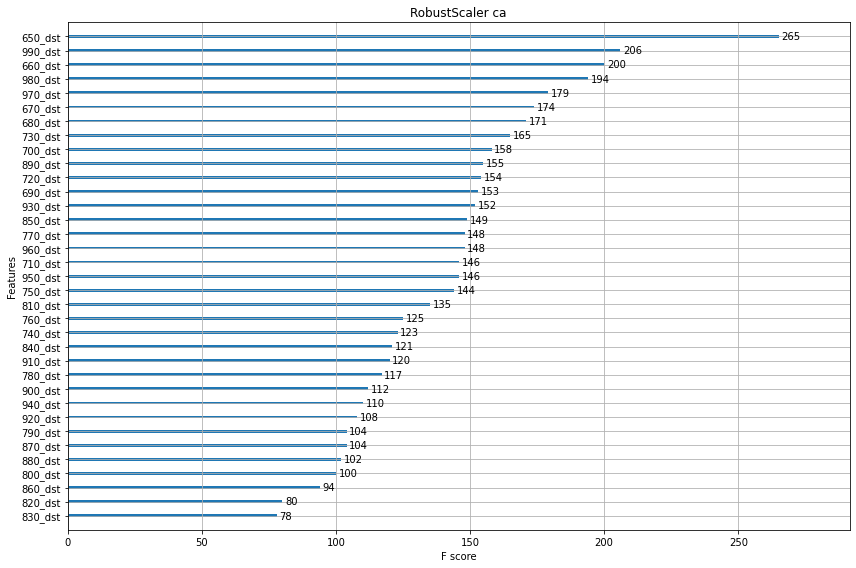

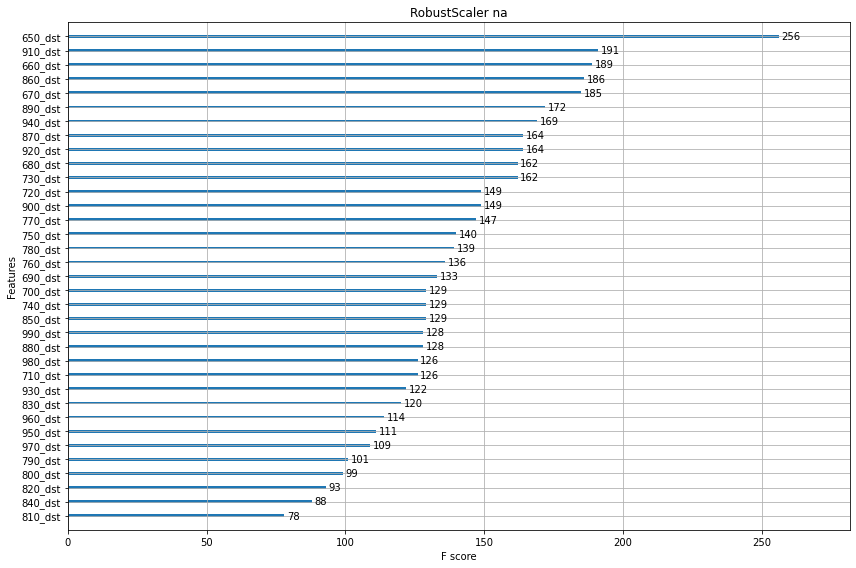

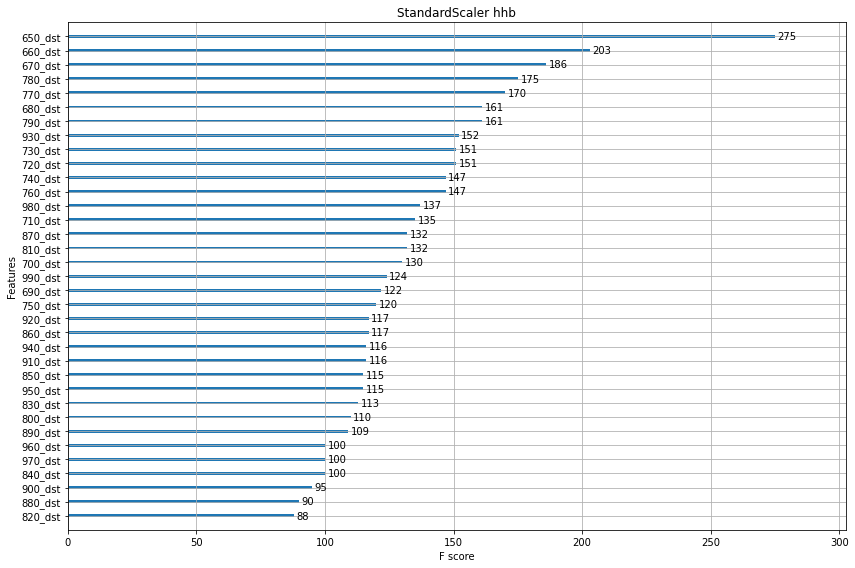

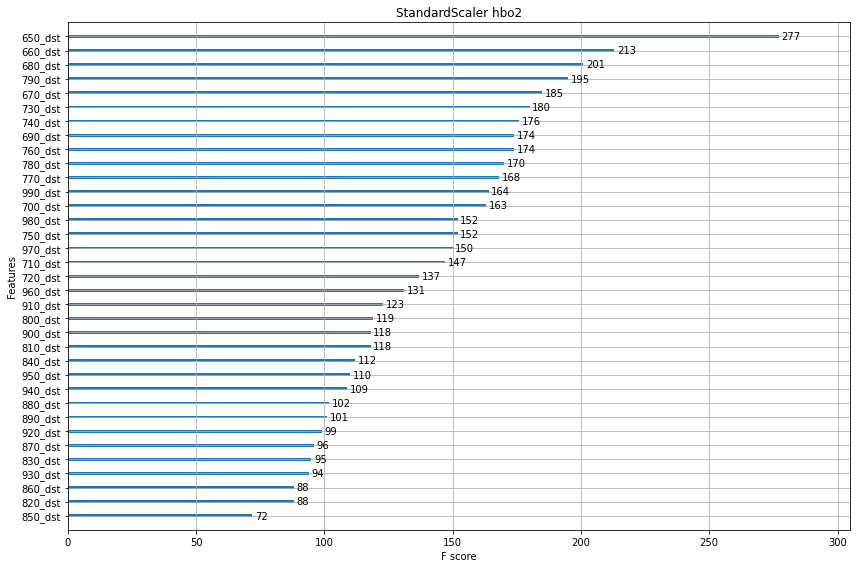

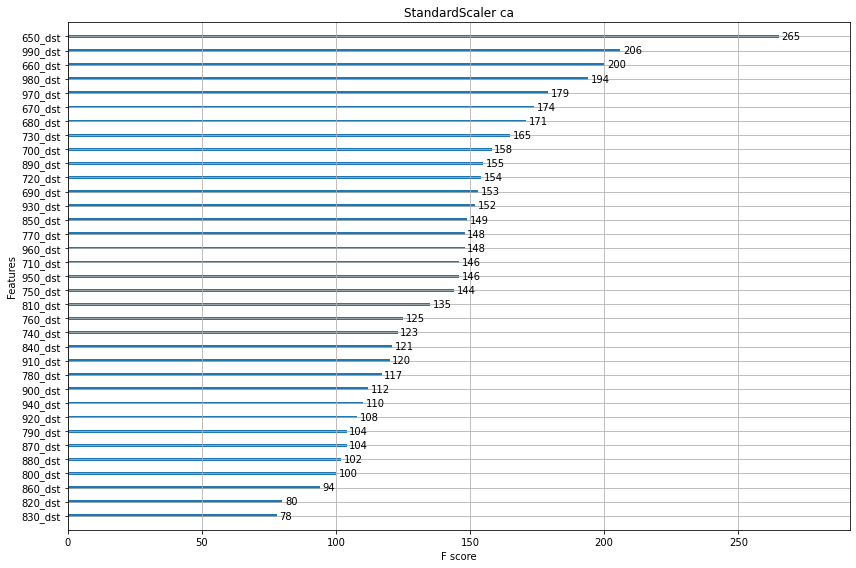

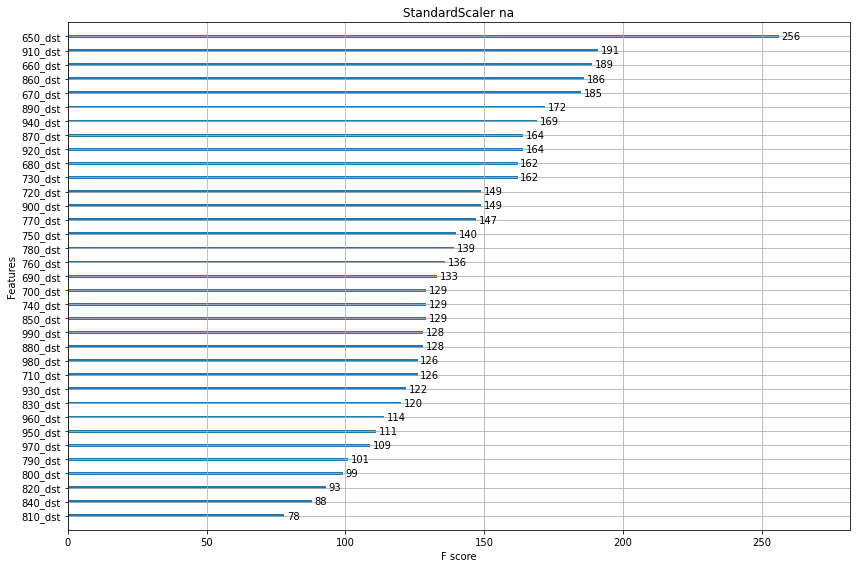

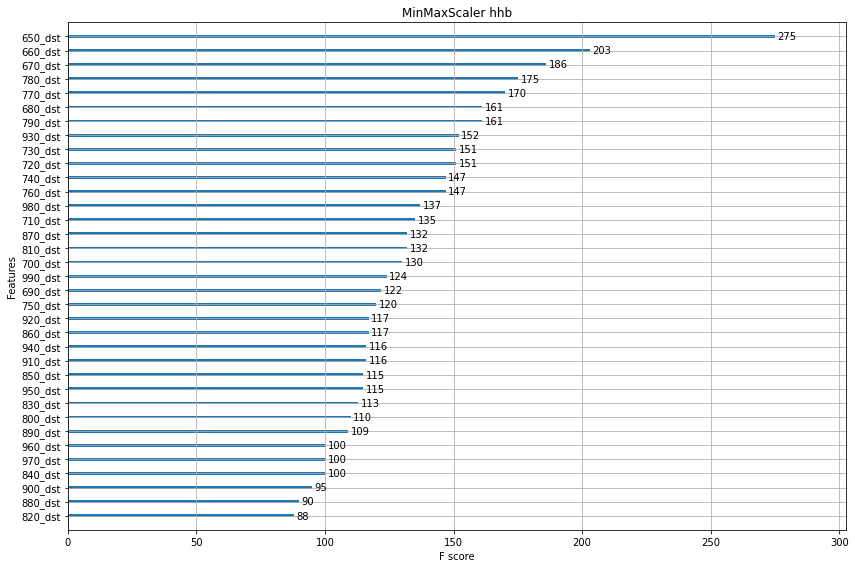

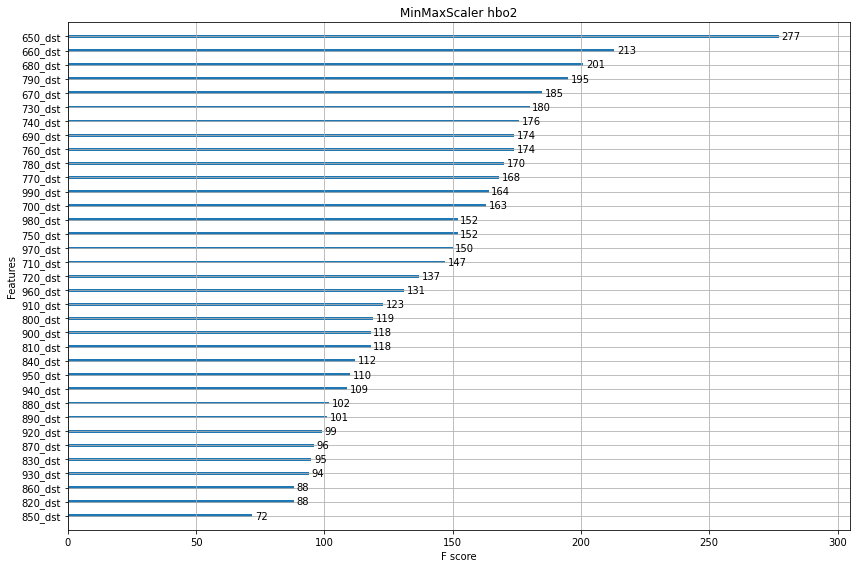

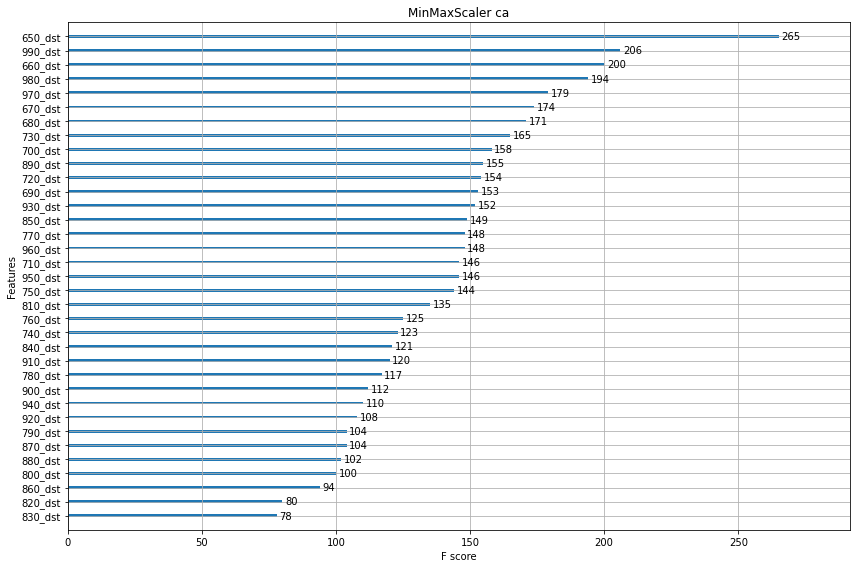

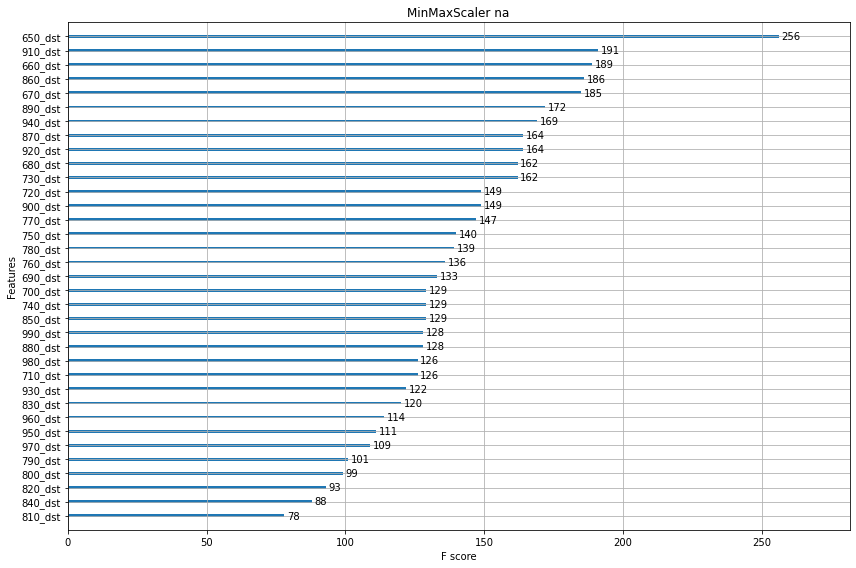

In [7]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scalers = [Normalizer(), RobustScaler(), StandardScaler(), MinMaxScaler()]

for scaler in scalers:
    X_scale = scaler.fit_transform(X_train)
    X_scale = pd.DataFrame(X_scale)
    X_scale.columns = X_train.columns

    for label in y_train:
        model = xgb.XGBRegressor()
        model.fit(X_train, y_train[label])

        ax = plot_importance(model)
        ax.set_title(f"{str(scaler)[:-2]} {label}")
        ax.figure.tight_layout()
        ax.figure.savefig(f"plot/{str(scaler)[:-2]}-{label}.png")